# Sređivanje podataka

## Učitavanje i provera NAN vrednosti

In [3]:
import yfinance as yf

# Preuzimamo S&P 500 od 2020. do 2025.
sp500 = yf.download("^GSPC", start="2020-01-01", end="2025-09-01", interval="1d", auto_adjust = False)

print(sp500.head())

[*********************100%***********************]  1 of 1 completed

Price         Adj Close        Close         High          Low         Open  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                          
2020-01-02  3257.850098  3257.850098  3258.139893  3235.530029  3244.669922   
2020-01-03  3234.850098  3234.850098  3246.149902  3222.340088  3226.360107   
2020-01-06  3246.280029  3246.280029  3246.840088  3214.639893  3217.550049   
2020-01-07  3237.179932  3237.179932  3244.909912  3232.429932  3241.860107   
2020-01-08  3253.050049  3253.050049  3267.070068  3236.669922  3238.590088   

Price           Volume  
Ticker           ^GSPC  
Date                    
2020-01-02  3459930000  
2020-01-03  3484700000  
2020-01-06  3702460000  
2020-01-07  3435910000  
2020-01-08  3726840000  


In [5]:
sp500 = sp500.reset_index()

In [7]:
print(sp500.head())      # prvih 5 redova
print(sp500.tail())      # poslednjih 5 redova
print(sp500.columns)     # nazivi kolona
print(sp500.shape)

Price        Date    Adj Close        Close         High          Low  \
Ticker                   ^GSPC        ^GSPC        ^GSPC        ^GSPC   
0      2020-01-02  3257.850098  3257.850098  3258.139893  3235.530029   
1      2020-01-03  3234.850098  3234.850098  3246.149902  3222.340088   
2      2020-01-06  3246.280029  3246.280029  3246.840088  3214.639893   
3      2020-01-07  3237.179932  3237.179932  3244.909912  3232.429932   
4      2020-01-08  3253.050049  3253.050049  3267.070068  3236.669922   

Price          Open      Volume  
Ticker        ^GSPC       ^GSPC  
0       3244.669922  3459930000  
1       3226.360107  3484700000  
2       3217.550049  3702460000  
3       3241.860107  3435910000  
4       3238.590088  3726840000  
Price        Date    Adj Close        Close         High          Low  \
Ticker                   ^GSPC        ^GSPC        ^GSPC        ^GSPC   
1418   2025-08-25  6439.319824  6439.319824  6466.890137  6438.060059   
1419   2025-08-26  6465.939941 

In [8]:
# 1. Broj nedostajućih vrednosti po koloni
print(sp500.isnull().sum())

# 2. Da li ceo DataFrame ima NaN vrednosti
print(sp500.isnull().values.any())

# 3. Ukupan broj NaN vrednosti
print(sp500.isnull().sum().sum())

Price      Ticker
Date                 0
Adj Close  ^GSPC     0
Close      ^GSPC     0
High       ^GSPC     0
Low        ^GSPC     0
Open       ^GSPC     0
Volume     ^GSPC     0
dtype: int64
False
0


In [9]:
# Spajanje u jedan nivo
sp500 = sp500.copy()
sp500.columns = sp500.columns.droplevel(1)  # skida drugi nivo (^GSPC)

print(sp500.head())

Price       Date    Adj Close        Close         High          Low  \
0     2020-01-02  3257.850098  3257.850098  3258.139893  3235.530029   
1     2020-01-03  3234.850098  3234.850098  3246.149902  3222.340088   
2     2020-01-06  3246.280029  3246.280029  3246.840088  3214.639893   
3     2020-01-07  3237.179932  3237.179932  3244.909912  3232.429932   
4     2020-01-08  3253.050049  3253.050049  3267.070068  3236.669922   

Price         Open      Volume  
0      3244.669922  3459930000  
1      3226.360107  3484700000  
2      3217.550049  3702460000  
3      3241.860107  3435910000  
4      3238.590088  3726840000  


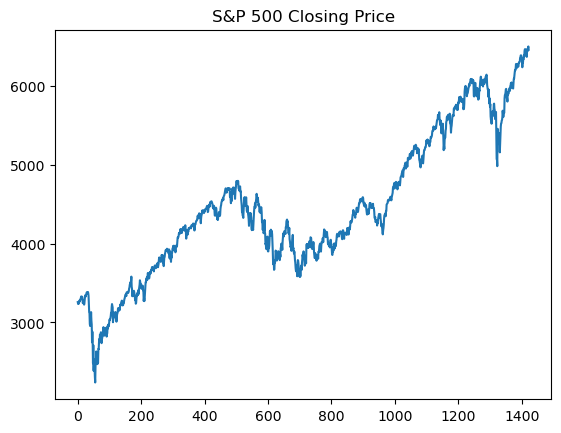

In [10]:
import matplotlib.pyplot as plt

sp500["Close"].plot(title="S&P 500 Closing Price")
plt.show()

## Dodavanje indikatora

U ovom delu je dodat indikator **Avg_Price**, kao i ostali zadati tehnički indikatori po uputstvu:

    1. SMA (14) i EMA (14) → napravi razliku EMA14 – SMA14 i koristi samo tu razliku kao indikator
    2. RSI (14)
    3. MACD (14, 42, 9) → čuvaš dva indikatora: MACD vrednost i MACD Diff = MACD – signal linija
    4. Bollinger (14, 2) → koristiš BB = Bollinger High – Bollinger Low
    5. ATR (14)
    6. OBV (14)

Svi indikatori su izračunati za svaki od osnovnih indikatora.

In [11]:
sp500['Avg_Price'] = (sp500['Close'] + sp500['Open'] + sp500['High']+ sp500['Low'])/4.0

In [13]:
sp500.columns.tolist()

['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Avg_Price']

In [16]:
def calculate_technical_indicators_advanced(df, price_columns=None, 
                                          rsi_window=14, macd_fast=14, 
                                          macd_slow=42, macd_signal=9,
                                          bb_window=14, bb_dev=2,
                                          atr_window=14, obv_window=14):
    if price_columns is None:
        price_columns = ['High', 'Low', 'Open', 'Close', 'Avg_Price']
    
    result_df = df.copy()
    
    for price_col in price_columns:
        # 1. EMA-SMA Diff
        SMA = result_df[price_col].rolling(window=rsi_window).mean()
        EMA = result_df[price_col].ewm(span=rsi_window, adjust=False).mean()
        result_df[f'EMA_SMA_Diff_{price_col}'] = EMA - SMA
        
        # 2. RSI
        result_df[f'RSI_{price_col}'] = ta.momentum.RSIIndicator(
            close=result_df[price_col], window=rsi_window
        ).rsi()
        
        # 3. MACD
        macd = ta.trend.MACD(
            close=result_df[price_col], 
            window_slow=macd_slow, 
            window_fast=macd_fast, 
            window_sign=macd_signal
        )
        result_df[f'MACD_{price_col}'] = macd.macd()
        result_df[f'MACD_Diff_{price_col}'] = macd.macd_diff()
        
        # 4. Bollinger Bands
        bollinger = ta.volatility.BollingerBands(
            close=result_df[price_col], 
            window=bb_window, 
            window_dev=bb_dev
        )
        Bollinger_High = bollinger.bollinger_hband()
        Bollinger_Low = bollinger.bollinger_lband()
        result_df[f'Bollinger_BB_{price_col}'] = Bollinger_High - Bollinger_Low
        
        # 5. ATR
        atr = ta.volatility.AverageTrueRange(
            high=result_df['High'],
            low=result_df['Low'],
            close=result_df[price_col],
            window=atr_window
        )
        result_df[f'ATR_{price_col}'] = atr.average_true_range()
        
        # 6. OBV
        obv = ta.volume.OnBalanceVolumeIndicator(
            close=result_df[price_col],
            volume=result_df['Volume']
        )
        OBV = obv.on_balance_volume()
        result_df[f'OBV{obv_window}_{price_col}'] = OBV.rolling(window=obv_window).mean()
    
    return result_df


In [18]:
import ta
sp500_ind = calculate_technical_indicators_advanced(sp500)

In [19]:
sp500_ind.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,Avg_Price,EMA_SMA_Diff_High,RSI_High,...,Bollinger_BB_Close,ATR_Close,OBV14_Close,EMA_SMA_Diff_Avg_Price,RSI_Avg_Price,MACD_Avg_Price,MACD_Diff_Avg_Price,Bollinger_BB_Avg_Price,ATR_Avg_Price,OBV14_Avg_Price
0,2020-01-02,3257.850098,3257.850098,3258.139893,3235.530029,3244.669922,3459930000,3249.047485,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2020-01-03,3234.850098,3234.850098,3246.149902,3222.340088,3226.360107,3484700000,3232.425049,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2020-01-06,3246.280029,3246.280029,3246.840088,3214.639893,3217.550049,3702460000,3231.327515,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,2020-01-07,3237.179932,3237.179932,3244.909912,3232.429932,3241.860107,3435910000,3239.094971,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,2020-01-08,3253.050049,3253.050049,3267.070068,3236.669922,3238.590088,3726840000,3248.845032,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [20]:
sp500_ind.columns.tolist()

['Date',
 'Adj Close',
 'Close',
 'High',
 'Low',
 'Open',
 'Volume',
 'Avg_Price',
 'EMA_SMA_Diff_High',
 'RSI_High',
 'MACD_High',
 'MACD_Diff_High',
 'Bollinger_BB_High',
 'ATR_High',
 'OBV14_High',
 'EMA_SMA_Diff_Low',
 'RSI_Low',
 'MACD_Low',
 'MACD_Diff_Low',
 'Bollinger_BB_Low',
 'ATR_Low',
 'OBV14_Low',
 'EMA_SMA_Diff_Open',
 'RSI_Open',
 'MACD_Open',
 'MACD_Diff_Open',
 'Bollinger_BB_Open',
 'ATR_Open',
 'OBV14_Open',
 'EMA_SMA_Diff_Close',
 'RSI_Close',
 'MACD_Close',
 'MACD_Diff_Close',
 'Bollinger_BB_Close',
 'ATR_Close',
 'OBV14_Close',
 'EMA_SMA_Diff_Avg_Price',
 'RSI_Avg_Price',
 'MACD_Avg_Price',
 'MACD_Diff_Avg_Price',
 'Bollinger_BB_Avg_Price',
 'ATR_Avg_Price',
 'OBV14_Avg_Price']

## Kreiranje odvojenih serija

Kreirana funkcija za kreiranje odvojenih datasetov-a za svaki sa od predloženih indikatora kako bismo kasnije testirali rad svake.

In [30]:
def create_separate_price_datasets(df_with_indicators, base_columns=['Open', 'High', 'Low', 'Close', 'Avg_Price']):
    separate_datasets = {}
    
    # Prvo proveri koje kolone zapravo postoje u DataFrame-u
    available_columns = [col for col in base_columns if col in df_with_indicators.columns]
    print(f"Dostupne cene za razdvajanje: {available_columns}")
    
    for price_col in available_columns:
        print(f"Kreiram odvojeni dataset za {price_col}...")
        
        base_cols = []
        if 'Date' in df_with_indicators.columns:
            base_cols.append('Date')
            print(f"  >>> Uključujem Date kolonu")
        if 'Volume' in df_with_indicators.columns:
            base_cols.append('Volume')
            print(f"  >>> Uključujem Volume kolonu")
        
        # Selektuj sve kolone koje se odnose na ovu cenu
        price_related_cols = [price_col]  # sama cena
        
        # Dodaj sve indikatore za ovu cenu
        indicator_patterns = [
            f'EMA_SMA_Diff_{price_col}',
            f'RSI_{price_col}', 
            f'MACD_{price_col}',
            f'MACD_Diff_{price_col}',
            f'Bollinger_BB_{price_col}',
            f'ATR_{price_col}',
            f'OBV14_{price_col}'
        ]
        
        for pattern in indicator_patterns:
            if pattern in df_with_indicators.columns:
                price_related_cols.append(pattern)
        
        # Kreiraj odvojeni dataset - OBVEZNO UKLJUČI BASE_COLS
        selected_cols = base_cols + price_related_cols
        separate_df = df_with_indicators[selected_cols].copy()
        
        print(f"  Odabrane kolone: {selected_cols}")
        
        # Preimenuj kolone da uklone sufiks (opciono, za čistiji izgled)
        rename_dict = {}
        for col in price_related_cols:
            if col != price_col:  # nemoj preimenovati samu cenu
                new_name = col.replace(f'_{price_col}', '')
                rename_dict[col] = new_name
        
        separate_df = separate_df.rename(columns=rename_dict)
        
        # Sačuvaj u dictionary
        separate_datasets[price_col] = separate_df
        
        print(f"  Kreiran dataset sa {len(separate_df.columns)} kolona")
        print(f"  Kolone: {list(separate_df.columns)}")
    
    return separate_datasets

In [33]:
print("KREIRAM DATASET-OVE SA DATE KOLONOM...")
separate_datasets = create_separate_price_datasets(sp500_ind)

# PROVERI DA LI SADA IMAJU DATE
print("\n" + "="*50)
print("PROVERA DATE KOLONE:")
print("="*50)

for price_name, dataset in separate_datasets.items():
    has_date = 'Date' in dataset.columns
    status = ">>> IMA DATE" if has_date else ">>> NEMA DATE"
    print(f"{price_name}: {status}")
    
    if has_date:
        print(f"  Prvi datum: {dataset['Date'].iloc[0]}")
        print(f"  Poslednji datum: {dataset['Date'].iloc[-1]}")
        print(f"  Oblik: {dataset.shape}")

# SAČUVAJ POPRAVLJENE DATASET-OVE
for price_name, dataset in separate_datasets.items():
    dataset_name = f"sp500_{price_name.lower()}_dataset"
    globals()[dataset_name] = dataset
    print(f"\n>>> Sačuvan {dataset_name}")

KREIRAM DATASET-OVE SA DATE KOLONOM...
Dostupne cene za razdvajanje: ['Open', 'High', 'Low', 'Close', 'Avg_Price']
Kreiram odvojeni dataset za Open...
  >>> Uključujem Date kolonu
  >>> Uključujem Volume kolonu
  Odabrane kolone: ['Date', 'Volume', 'Open', 'EMA_SMA_Diff_Open', 'RSI_Open', 'MACD_Open', 'MACD_Diff_Open', 'Bollinger_BB_Open', 'ATR_Open', 'OBV14_Open']
  Kreiran dataset sa 10 kolona
  Kolone: ['Date', 'Volume', 'Open', 'EMA_SMA_Diff', 'RSI', 'MACD', 'MACD_Diff', 'Bollinger_BB', 'ATR', 'OBV14']
Kreiram odvojeni dataset za High...
  >>> Uključujem Date kolonu
  >>> Uključujem Volume kolonu
  Odabrane kolone: ['Date', 'Volume', 'High', 'EMA_SMA_Diff_High', 'RSI_High', 'MACD_High', 'MACD_Diff_High', 'Bollinger_BB_High', 'ATR_High', 'OBV14_High']
  Kreiran dataset sa 10 kolona
  Kolone: ['Date', 'Volume', 'High', 'EMA_SMA_Diff', 'RSI', 'MACD', 'MACD_Diff', 'Bollinger_BB', 'ATR', 'OBV14']
Kreiram odvojeni dataset za Low...
  >>> Uključujem Date kolonu
  >>> Uključujem Volume kol

### Čišćenje od NAN vrednosti

In [35]:
def clean_separated_datasets(separate_datasets, trim_count=42, remove_remaining_nan=True):
    
    cleaned_datasets = {}
    
    print("ČIŠĆENJE ODVOJENIH DATASET-OVA")
    print("=" * 60)
    
    for price_name, dataset in separate_datasets.items():
        print(f"\n Procesuiram {price_name} dataset...")
        original_shape = dataset.shape
        print(f"   Originalni oblik: {original_shape}")
        print(f"   Ima Date: {'Date' in dataset.columns}")
        
        # Sačuvaj Date kolonu pre reset_index
        date_column = None
        if 'Date' in dataset.columns:
            date_column = dataset['Date'].copy()
            print(f"  >>> Sačuvana Date kolona")
        
        # Korak 1: Ukloni prvih trim_count redova
        if trim_count > 0 and len(dataset) > trim_count:
            temp_dataset = dataset.iloc[trim_count:].copy()
            if date_column is not None:
                temp_dataset['Date'] = date_column.iloc[trim_count:].values
            print(f"   Uklonjeno prvih {trim_count} redova")
        else:
            temp_dataset = dataset.copy()
            print(f"   Preskačem uklanjanje početnih redova")
        
        # Korak 2: Ukloni preostale NaN vrednosti ako je potrebno
        if remove_remaining_nan:
            before_nan = temp_dataset.isnull().sum().sum()
            if before_nan > 0:
                # Sačuvaj indekse pre dropna()
                original_index = temp_dataset.index
                temp_dataset = temp_dataset.dropna()
                
                # Ažuriraj Date kolonu nakon dropna()
                if date_column is not None:
                    remaining_dates = date_column.loc[temp_dataset.index]
                    temp_dataset['Date'] = remaining_dates.values
                
                after_nan = temp_dataset.isnull().sum().sum()
                print(f"   Uklonjeno {before_nan} preostalih NaN vrednosti")
            else:
                print(f"   Nema preostalih NaN vrednosti")
        
        # Korak 3: Resetuj index BEZ gubitka Date kolone
        temp_dataset = temp_dataset.reset_index(drop=True)
        
        # Korak 4: Provera rezultata
        final_shape = temp_dataset.shape
        rows_removed = original_shape[0] - final_shape[0]
        
        print(f"   Konačni oblik: {final_shape}")
        print(f"   Ima Date: {'Date' in temp_dataset.columns}")
        print(f"   Ukupno uklonjeno redova: {rows_removed}")
        print(f"   Sačuvano redova: {final_shape[0]} ({final_shape[0]/original_shape[0]*100:.1f}%)")
        
        cleaned_datasets[price_name] = temp_dataset
    
    return cleaned_datasets

In [36]:
def validate_cleaned_datasets(cleaned_datasets):
    """
    Proverava kvalitet očišćenih dataset-ova
    """
    print("\n" + "=" * 60)
    print("VALIDACIJA OČIŠĆENIH DATASET-OVA")
    print("=" * 60)
    
    validation_results = {}
    
    for price_name, dataset in cleaned_datasets.items():
        print(f"\n🔍 Validacija {price_name} dataset-a:")
        
        # Provera NaN vrednosti
        nan_count = dataset.isnull().sum().sum()
        nan_by_column = dataset.isnull().sum()
        
        # Provera dužine
        dataset_length = len(dataset)
        
        # Provera datuma (ako postoji)
        if 'Date' in dataset.columns:
            date_range = f"{dataset['Date'].min()} do {dataset['Date'].max()}"
        else:
            date_range = "Nema Date kolone"
        
        # Prikaz rezultata
        print(f"   >>> Dužina: {dataset_length} redova")
        print(f"   >>> NaN vrednosti: {nan_count}")
        print(f"   >>> Period: {date_range}")
        
        if nan_count > 0:
            print(f"   >>>  Kolone sa NaN vrednostima:")
            for col, count in nan_by_column[nan_by_column > 0].items():
                print(f"      {col}: {count} NaN")
        else:
            print(f"  >>> Nema NaN vrednosti")
        
        # Čuvanje rezultata
        validation_results[price_name] = {
            'length': dataset_length,
            'nan_count': nan_count,
            'date_range': date_range
        }
    
    # Provera konzistentnosti između dataset-ova
    print(f"\n>>> KONZISTENTNOST IZMEĐU DATASET-OVA:")
    lengths = [result['length'] for result in validation_results.values()]
    
    if len(set(lengths)) == 1:
        print(f"   >>> Svi dataset-ovi imaju istu dužinu: {lengths[0]} redova")
    else:
        print(f"   >>>  Dataset-ovi imaju različite dužine:")
        for price_name, result in validation_results.items():
            print(f"      {price_name}: {result['length']} redova")
    
    return validation_results

In [37]:
cleaned_datasets = clean_separated_datasets(
    separate_datasets, 
    trim_count=42, 
    remove_remaining_nan=True
)

ČIŠĆENJE ODVOJENIH DATASET-OVA

 Procesuiram Open dataset...
   Originalni oblik: (1423, 10)
   Ima Date: True
  >>> Sačuvana Date kolona
   Uklonjeno prvih 42 redova
   Uklonjeno 7 preostalih NaN vrednosti
   Konačni oblik: (1374, 10)
   Ima Date: True
   Ukupno uklonjeno redova: 49
   Sačuvano redova: 1374 (96.6%)

 Procesuiram High dataset...
   Originalni oblik: (1423, 10)
   Ima Date: True
  >>> Sačuvana Date kolona
   Uklonjeno prvih 42 redova
   Uklonjeno 7 preostalih NaN vrednosti
   Konačni oblik: (1374, 10)
   Ima Date: True
   Ukupno uklonjeno redova: 49
   Sačuvano redova: 1374 (96.6%)

 Procesuiram Low dataset...
   Originalni oblik: (1423, 10)
   Ima Date: True
  >>> Sačuvana Date kolona
   Uklonjeno prvih 42 redova
   Uklonjeno 7 preostalih NaN vrednosti
   Konačni oblik: (1374, 10)
   Ima Date: True
   Ukupno uklonjeno redova: 49
   Sačuvano redova: 1374 (96.6%)

 Procesuiram Close dataset...
   Originalni oblik: (1423, 10)
   Ima Date: True
  >>> Sačuvana Date kolona
 

In [38]:
# 5. Sačuvaj OČIŠĆENE serije
print("\nKORAK 5: Čuvanje očišćenih serija...")
for price_name, dataset in cleaned_datasets.items():
    dataset_name = f"sp500_{price_name.lower()}_clean"
    globals()[dataset_name] = dataset
    print(f"   Sačuvano: {dataset_name} ({len(dataset)} redova)")


KORAK 5: Čuvanje očišćenih serija...
   Sačuvano: sp500_open_clean (1374 redova)
   Sačuvano: sp500_high_clean (1374 redova)
   Sačuvano: sp500_low_clean (1374 redova)
   Sačuvano: sp500_close_clean (1374 redova)
   Sačuvano: sp500_avg_price_clean (1374 redova)


In [39]:
# 6. Validacija rezultata
print("\nKORAK 6: Validacija...")
validation_results = validate_cleaned_datasets(cleaned_datasets)


KORAK 6: Validacija...

VALIDACIJA OČIŠĆENIH DATASET-OVA

🔍 Validacija Open dataset-a:
   >>> Dužina: 1374 redova
   >>> NaN vrednosti: 0
   >>> Period: 2020-03-13 00:00:00 do 2025-08-29 00:00:00
  >>> Nema NaN vrednosti

🔍 Validacija High dataset-a:
   >>> Dužina: 1374 redova
   >>> NaN vrednosti: 0
   >>> Period: 2020-03-13 00:00:00 do 2025-08-29 00:00:00
  >>> Nema NaN vrednosti

🔍 Validacija Low dataset-a:
   >>> Dužina: 1374 redova
   >>> NaN vrednosti: 0
   >>> Period: 2020-03-13 00:00:00 do 2025-08-29 00:00:00
  >>> Nema NaN vrednosti

🔍 Validacija Close dataset-a:
   >>> Dužina: 1374 redova
   >>> NaN vrednosti: 0
   >>> Period: 2020-03-13 00:00:00 do 2025-08-29 00:00:00
  >>> Nema NaN vrednosti

🔍 Validacija Avg_Price dataset-a:
   >>> Dužina: 1374 redova
   >>> NaN vrednosti: 0
   >>> Period: 2020-03-13 00:00:00 do 2025-08-29 00:00:00
  >>> Nema NaN vrednosti

>>> KONZISTENTNOST IZMEĐU DATASET-OVA:
   >>> Svi dataset-ovi imaju istu dužinu: 1374 redova


### Korelaciona matrica 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

>>> OSNOVNA KORELACIONA ANALIZA
Close indikatori (8): ['Adj Close', 'EMA_SMA_Diff_Close', 'RSI_Close', 'MACD_Close', 'MACD_Diff_Close', 'Bollinger_BB_Close', 'ATR_Close', 'OBV14_Close']
Avg_Price indikatori (7): ['EMA_SMA_Diff_Avg_Price', 'RSI_Avg_Price', 'MACD_Avg_Price', 'MACD_Diff_Avg_Price', 'Bollinger_BB_Avg_Price', 'ATR_Avg_Price', 'OBV14_Avg_Price']


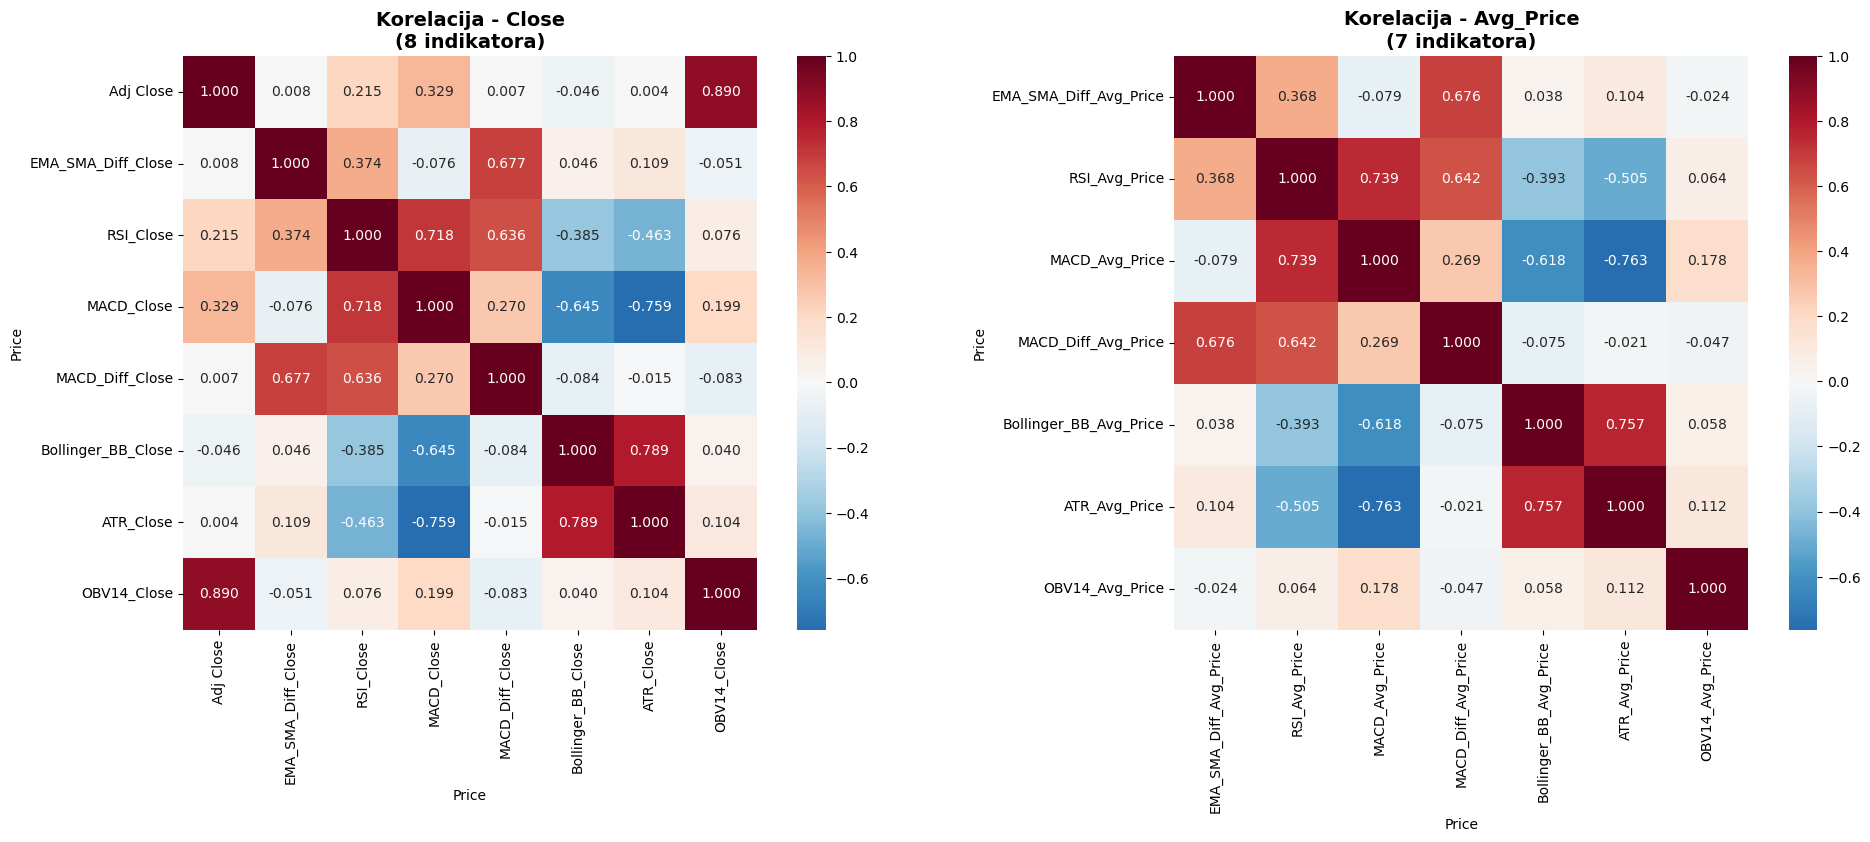


>>> ANALIZA ZAVRŠENA
   Close: 8 indikatora
   Avg_Price: 7 indikatora


In [42]:
def run_basic_correlation_analysis(df):
    """
    Osnovna korelaciona analiza - prikazuje samo ono što postoji
    """
    print(">>> OSNOVNA KORELACIONA ANALIZA")
    print("=" * 50)
    
    # Proveri šta imamo
    all_columns = df.columns.tolist()
    
    # Indikatori za Close
    close_indicators = [col for col in all_columns if 'Close' in col and col != 'Close']
    print(f"Close indikatori ({len(close_indicators)}): {close_indicators}")
    
    # Indikatori za Avg_Price
    avg_price_indicators = [col for col in all_columns if 'Avg_Price' in col and col != 'Avg_Price']
    print(f"Avg_Price indikatori ({len(avg_price_indicators)}): {avg_price_indicators}")
    
    # Kreiraj plotove za ono što postoji
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Close heatmap
    if len(close_indicators) >= 2:
        close_corr = df[close_indicators].corr()
        sns.heatmap(close_corr, annot=True, fmt=".3f", cmap="RdBu_r", center=0, square=True, ax=axes[0])
        axes[0].set_title(f'Korelacija - Close\n({len(close_indicators)} indikatora)', fontsize=14, fontweight='bold')
    else:
        axes[0].text(0.5, 0.5, f'Nedovoljno indikatora\nza Close: {len(close_indicators)}', 
                    ha='center', va='center', fontsize=12)
        axes[0].set_title('Korelacija - Close', fontsize=14, fontweight='bold')
    
    # Avg_Price heatmap  
    if len(avg_price_indicators) >= 2:
        avg_corr = df[avg_price_indicators].corr()
        sns.heatmap(avg_corr, annot=True, fmt=".3f", cmap="RdBu_r", center=0, square=True, ax=axes[1])
        axes[1].set_title(f'Korelacija - Avg_Price\n({len(avg_price_indicators)} indikatora)', fontsize=14, fontweight='bold')
    else:
        axes[1].text(0.5, 0.5, f'Nedovoljno indikatora\nza Avg_Price: {len(avg_price_indicators)}', 
                    ha='center', va='center', fontsize=12)
        axes[1].set_title('Korelacija - Avg_Price', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n>>> ANALIZA ZAVRŠENA")
    print(f"   Close: {len(close_indicators)} indikatora")
    print(f"   Avg_Price: {len(avg_price_indicators)} indikatora")

# POKRENI OVU FUNKCIJU UMESTO ONE KOJA DAJE GREŠKU
run_basic_correlation_analysis(sp500_ind)

**JAKA korelacija (slične vrednosti):**

RSI – MACD:           Close=0.718 vs Avg_Price=0.739

MACD – ATR:          Close=-0.759 vs Avg_Price=-0.763

Bollinger – ATR:     Close=0.789 vs Avg_Price=0.757

EMA-SMA – MACD_Diff: Close=0.677 vs Avg_Price=0.676

**NAJVEĆA RAZLIKA:**

RSI – MACD_Diff:     Close=0.636 vs Avg_Price=0.269  - Razlika: 0.367!

**Ostale razlike**

MACD – Bollinger:    Close=-0.645 vs Avg_Price=-0.618

RSI – ATR:          Close=-0.463 vs Avg_Price=-0.505

# LSTM model - najnovija verzija

U ovom delu sam vršila veći broj različitih verizija modela kao i pripreme podataka. Nisam još uvek radila neki konkretan feature selection već je sledeći model baziran isključivo na svim indikatorima odnosno zasebno za svaku prethodno kreiranu seriju. Cilj ovog dela jeste da se proveri kome ovakav model najviše i odgovara. Korišćena je standardizacija, samo što ovog puta sam više vodila računa o data leakage-u. Implementiran je i early stopping kako bi se zaustavilo overfittovanje.

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (LSTM, Dense, Dropout, Input, 
                                   Conv1D, MaxPooling1D, Flatten,
                                   BatchNormalization, Activation)
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau, 
                                      ModelCheckpoint, TensorBoard)
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import plot_model

Pripremljeni podaci

In [51]:
def prepare_lstm_data_with_date_split(dataset, target_col, sequence_length=60, split_date='2025-01-01'):
    """
    Priprema podatke za LSTM sa podelom po datumu
    """
    dataset = dataset.copy()
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    
    train_data = dataset[dataset['Date'] < split_date]
    test_data = dataset[dataset['Date'] >= split_date]
    
    print(f" PODELA PODATAKA:")
    print(f"   Trening: {train_data['Date'].min()} do {train_data['Date'].max()} ({len(train_data)} redova)")
    print(f"   Test:    {test_data['Date'].min()} do {test_data['Date'].max()} ({len(test_data)} redova)")
    
    numeric_cols = [col for col in dataset.columns if col != 'Date']
    target_idx = numeric_cols.index(target_col)
    
    # Kreiraj sekvence za trening
    X_train, y_train = [], []
    train_values = train_data[numeric_cols].values
    
    for i in range(sequence_length, len(train_values)):
        X_train.append(train_values[i-sequence_length:i])
        y_train.append(train_values[i, target_idx])
    
    # Kreiraj sekvence za test
    X_test, y_test = [], []
    test_values = test_data[numeric_cols].values
    
    for i in range(sequence_length, len(test_values)):
        X_test.append(test_values[i-sequence_length:i])
        y_test.append(test_values[i, target_idx])
    
    return (np.array(X_train), np.array(y_train), 
            np.array(X_test), np.array(y_test),
            train_data, test_data)

In [52]:
def plot_results_comparison_safe(results):
    """
    Bezbedno prikazuje rezultate čak i ako je results prazan
    """
    print("\n" + "="*60)
    print(" UPOREDNI REZULTATI SVIH MODELA")
    print("="*60)
    
    # Proveri da li results nije prazan
    if not results:
        print(" NEMA REZULTATA - svi modeli su preskočeni")
        return None
    
    metrics = []
    for price_name, result in results.items():
        metrics.append({
            'Cena': price_name,
            'MSE': result['mse'],
            'MAE': result['mae'],
            'Overfitting_Gap': result.get('overfitting_gap', 0),
            'Trening_uzoraka': len(result.get('X_train', [])),
            'Test_uzoraka': len(result.get('X_test', []))
        })
    
    metrics_df = pd.DataFrame(metrics)
    
    # Bezbedno sortiranje
    if len(metrics_df) > 0 and 'MSE' in metrics_df.columns:
        metrics_df = metrics_df.sort_values('MSE')
        print(" PERFORMANCE METRIKE:")
        print(metrics_df.to_string(index=False))
        
        # Prikaz grafika
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # MSE comparison
        ax1.bar(metrics_df['Cena'], metrics_df['MSE'], color='skyblue', alpha=0.7)
        ax1.set_title('MSE Comparison po Cenama\n(manje je bolje)')
        ax1.set_ylabel('Mean Squared Error')
        ax1.tick_params(axis='x', rotation=45)
        
        # MAE comparison  
        ax2.bar(metrics_df['Cena'], metrics_df['MAE'], color='lightcoral', alpha=0.7)
        ax2.set_title('MAE Comparison po Cenama\n(manje je bolje)')
        ax2.set_ylabel('Mean Absolute Error')
        ax2.tick_params(axis='x', rotation=45)
        
        # Overfitting gap
        ax3.bar(metrics_df['Cena'], metrics_df['Overfitting_Gap'], color='orange', alpha=0.7)
        ax3.set_title('Overfitting Gap\n(manje je bolje)')
        ax3.set_ylabel('Val Loss - Train Loss')
        ax3.axhline(y=0.1, color='red', linestyle='--', label='Overfitting threshold')
        ax3.tick_params(axis='x', rotation=45)
        ax3.legend()
        
        # Sample sizes
        ax4.bar(metrics_df['Cena'], metrics_df['Test_uzoraka'], color='lightgreen', alpha=0.7, label='Test')
        ax4.bar(metrics_df['Cena'], metrics_df['Trening_uzoraka'], color='blue', alpha=0.5, label='Trening')
        ax4.set_title('Veličine Uzoraka')
        ax4.set_ylabel('Broj sekvenci')
        ax4.tick_params(axis='x', rotation=45)
        ax4.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Analiza overfitting-a
        print(f"\n🔍 ANALIZA OVERFITTING-A:")
        high_overfitting = metrics_df[metrics_df['Overfitting_Gap'] > 0.2]
        moderate_overfitting = metrics_df[(metrics_df['Overfitting_Gap'] > 0.1) & (metrics_df['Overfitting_Gap'] <= 0.2)]
        good_generalization = metrics_df[metrics_df['Overfitting_Gap'] <= 0.1]
        
        if len(high_overfitting) > 0:
            print(f" VISOK OVERFITTING: {list(high_overfitting['Cena'])}")
        if len(moderate_overfitting) > 0:
            print(f"  UMEREN OVERFITTING: {list(moderate_overfitting['Cena'])}")
        if len(good_generalization) > 0:
            print(f" DOBRA GENERALIZACIJA: {list(good_generalization['Cena'])}")
            
    else:
        print(" Nema metrika za prikaz")
    
    return metrics_df

In [53]:
def dynamic_standardize_sequences(X_train, y_train, X_test, y_test):
    """
    Standardizacija BEZ DATA LEAKAGE - koristi samo trening statistiku
    """
    # Standardizuj FEATURE-E koristeći SAMO trening statistiku
    X_mean = np.mean(X_train, axis=(0, 1))
    X_std = np.std(X_train, axis=(0, 1))
    X_std = np.where(X_std == 0, 1, X_std)
    
    X_train_std = (X_train - X_mean) / X_std
    # Test standardizujemo ISTOM statistikom iz treninga
    X_test_std = (X_test - X_mean) / X_std
    
    # Standardizuj TARGET koristeći SAMO trening statistiku
    y_mean = np.mean(y_train)
    y_std = np.std(y_train)
    y_std = 1 if y_std == 0 else y_std
    
    y_train_std = (y_train - y_mean) / y_std
    # Test target standardizujemo ISTOM statistikom iz treninga
    y_test_std = (y_test - y_mean) / y_std
    
    standardization_params = {
        'X_mean': X_mean, 'X_std': X_std,
        'y_mean': y_mean, 'y_std': y_std
    }
    
    print(f"   Standardizacija - Target: mean={y_mean:.2f}, std={y_std:.2f}")
    
    return X_train_std, y_train_std, X_test_std, y_test_std, standardization_params

def inverse_standardize_predictions(predictions_std, y_mean, y_std):
    """
    Vraća predikcije u originalnu skalu
    """
    return (predictions_std * y_std) + y_mean

In [54]:
def create_smart_callbacks():
    """
    Kombinuje EarlyStopping i ReduceLROnPlateau
    """
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=25,
        min_delta=0.02,
        restore_best_weights=True,
        verbose=1
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=0.0001,
        verbose=1
    )
    
    return [early_stop, reduce_lr]

In [60]:
def create_lstm_model_fixed(time_steps, n_features):
    """
    ISPRAVLJENI LSTM model - MANJE KOMPLEKSNOSTI
    """
    model = Sequential([
        # SAMO 2 LSTM sloja umesto 3
        LSTM(32, return_sequences=True, input_shape=(time_steps, n_features), 
             dropout=0.3, recurrent_dropout=0.3),  # POVEĆAJ dropout
        LSTM(16, dropout=0.3, recurrent_dropout=0.3),  # MANJE neurona
        Dense(8, activation='relu'),
        Dropout(0.4),  # POVEĆAJ dropout
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [58]:
def train_lstm_fixed(cleaned_datasets, sequence_length=60, split_date='2025-01-01'):
    results = {}

    for price_name, dataset in cleaned_datasets.items():
        print(f"Treniram LSTM za {price_name}...")
        print("=" * 50)
        
        target_col = 'Avg_Price' if price_name == 'Avg_Price' else price_name
        
        if 'Date' not in dataset.columns:
            print(f"{price_name} nema Date kolonu - preskacem")
            continue
        
        X_train, y_train, X_test, y_test, train_data, test_data = prepare_lstm_data_with_date_split(
            dataset, target_col, sequence_length, split_date
        )
        
        if len(X_train) == 0 or len(X_test) == 0:
            print(f"Nedovoljno podataka za {price_name} - preskacem")
            continue
        
        print(f"Trening sekvence: {X_train.shape}")
        print(f"Test sekvence: {X_test.shape}")
        
        print("Standardizujem podatke...")
        X_train_std, y_train_std, X_test_std, y_test_std, std_params = dynamic_standardize_sequences(
            X_train, y_train, X_test, y_test
        )
        
        model = create_lstm_model_fixed(X_train_std.shape[1], X_train_std.shape[2])
        
        callbacks = create_smart_callbacks()
        
        print("Pocinjem trening...")
        history = model.fit(X_train_std, y_train_std, 
                          epochs=100,
                          batch_size=32,
                          validation_data=(X_test_std, y_test_std),
                          verbose=1,
                          callbacks=callbacks)
        
        best_epoch = np.argmin(history.history['val_loss'])
        best_val_loss = history.history['val_loss'][best_epoch]
        best_train_loss = history.history['loss'][best_epoch]
        
        predictions_std = model.predict(X_test_std)
        predictions = inverse_standardize_predictions(
            predictions_std, 
            std_params['y_mean'], 
            std_params['y_std']
        )
        
        mse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        
        overfitting_gap = best_val_loss - best_train_loss
        
        print(f"{price_name} zavrseno")
        print(f"Najbolji epoch: {best_epoch + 1}")
        print(f"Najbolji val loss: {best_val_loss:.4f}")
        print(f"MSE: {mse:.2f}")
        print(f"MAE: {mae:.2f} points")
        print(f"Overfitting gap: {overfitting_gap:.4f}")
        
        results[price_name] = {
            'model': model,
            'history': history,
            'predictions': predictions,
            'actual': y_test,
            'mse': mse, 'mae': mae,
            'overfitting_gap': overfitting_gap,
            'standardization_params': std_params,
            'best_epoch': best_epoch + 1,
            'X_train': X_train_std,
            'X_test': X_test_std
        }
    
    # Dodaj poziv za prikaz rezultata
    plot_results_comparison_safe(results)
    
    return results

POKREĆEM ISPRAVLJENU VERZIJU...
Treniram LSTM za Open...
 PODELA PODATAKA:
   Trening: 2020-03-13 00:00:00 do 2024-12-31 00:00:00 (1209 redova)
   Test:    2025-01-02 00:00:00 do 2025-08-29 00:00:00 (165 redova)
Trening sekvence: (1149, 60, 9)
Test sekvence: (105, 60, 9)
Standardizujem podatke...
   Standardizacija - Target: mean=4380.42, std=682.54
Pocinjem trening...
Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - loss: 0.8760 - mae: 0.6954 - val_loss: 5.4689 - val_mae: 2.2999 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.5868 - mae: 0.5573 - val_loss: 3.3592 - val_mae: 1.7946 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.4111 - mae: 0.4745 - val_loss: 2.1615 - val_mae: 1.4326 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.4169 - mae: 0.4743 - val_loss: 1.5615 - val_mae: 1.2069 - learning_rate: 0.0010
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss:

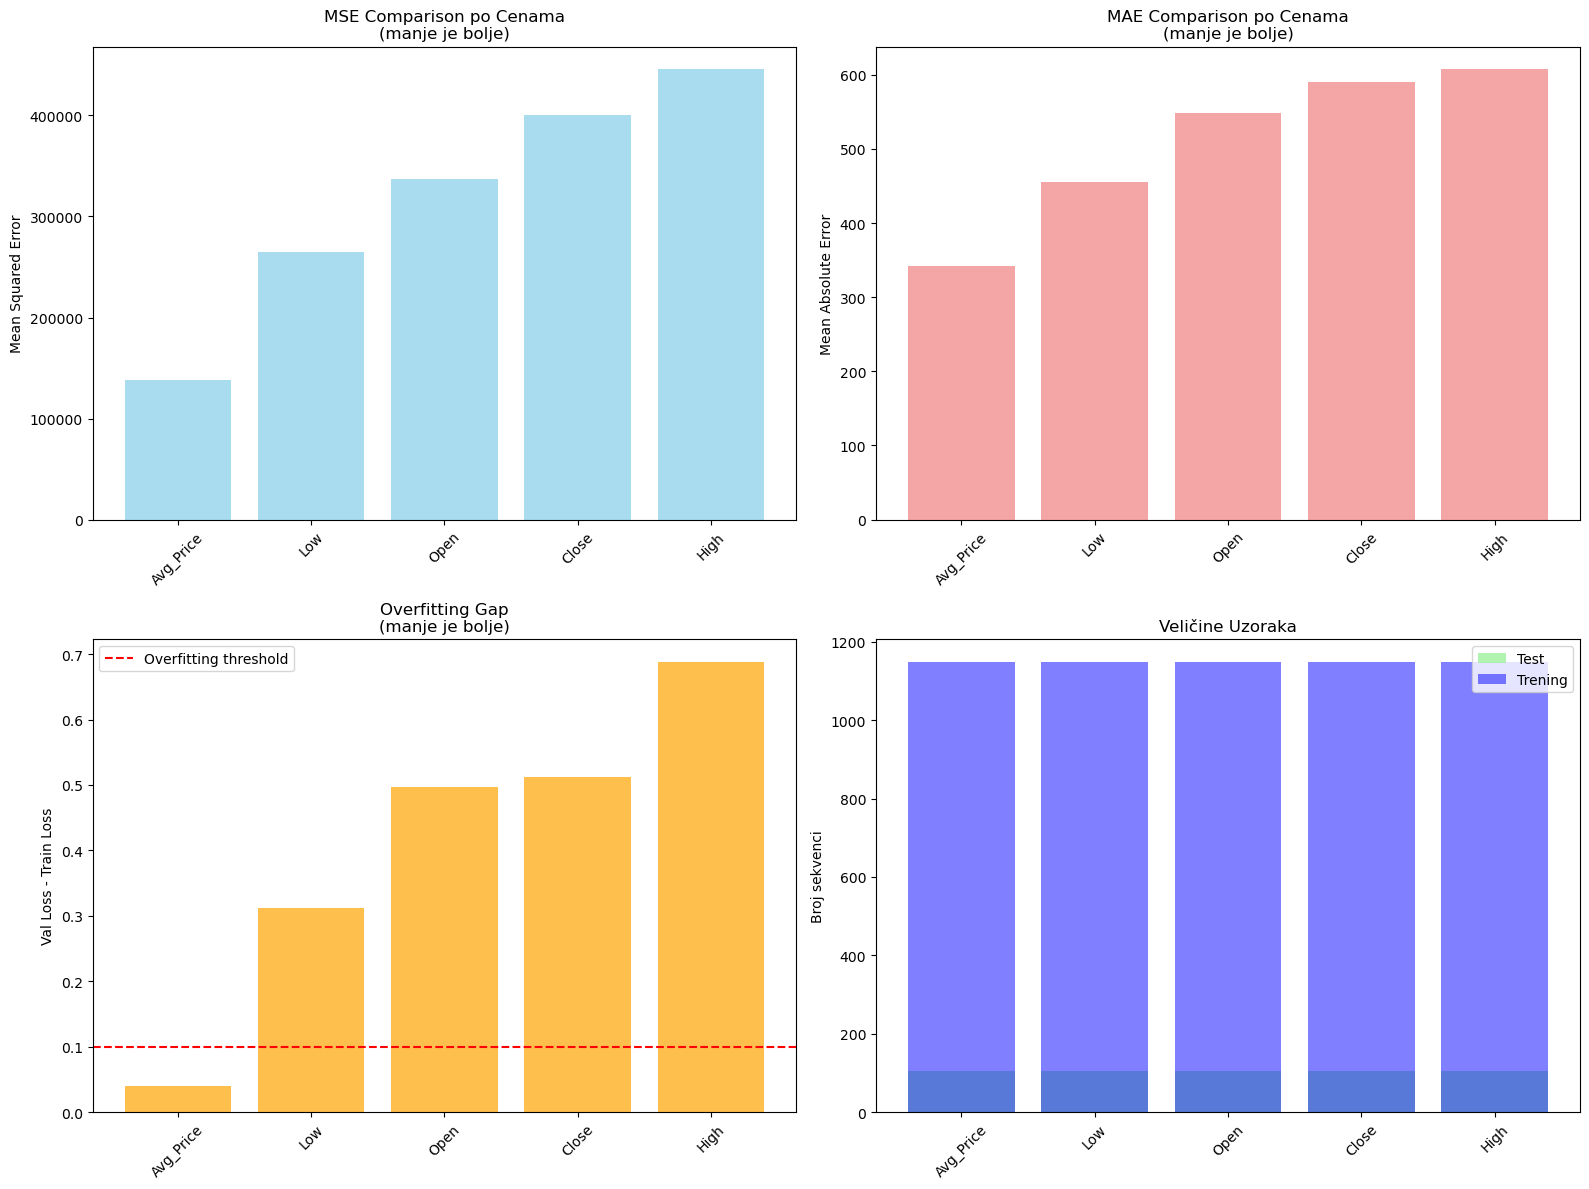


🔍 ANALIZA OVERFITTING-A:
 VISOK OVERFITTING: ['Low', 'Open', 'Close', 'High']
 DOBRA GENERALIZACIJA: ['Avg_Price']

ANALIZA ISPRAVLJENIH REZULTATA:
Open:
  MAE: 374129 points
  Najbolji epoch: 27
  Overfitting gap: 0.4967
High:
  MAE: 413910 points
  Najbolji epoch: 20
  Overfitting gap: 0.6883
Low:
  MAE: 311346 points
  Najbolji epoch: 24
  Overfitting gap: 0.3122
Close:
  MAE: 402703 points
  Najbolji epoch: 9
  Overfitting gap: 0.5127
Avg_Price:
  MAE: 232978 points
  Najbolji epoch: 16
  Overfitting gap: 0.0400


In [61]:
# POKRENI SA ISPRAVLJENOM FUNKCIJOM
print("POKREĆEM ISPRAVLJENU VERZIJU...")
results_fixed = train_lstm_fixed(
    cleaned_datasets,
    sequence_length=60,
    split_date='2025-01-01'
)

# ANALIZIRAJ REZULTATE
print("\nANALIZA ISPRAVLJENIH REZULTATA:")
for price_name, result in results_fixed.items():
    real_mae = result['mae'] * result['standardization_params']['y_std']
    print(f"{price_name}:")
    print(f"  MAE: {real_mae:.0f} points")
    print(f"  Najbolji epoch: {result['best_epoch']}")
    print(f"  Overfitting gap: {result['overfitting_gap']:.4f}")

# Analiza rezultata ali samo za Avg_Price

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def evaluate_avg_price_model(results, price_name='Avg_Price'):
    """
    Sveobuhvatna evaluacija za Avg_Price model
    """
    if price_name not in results:
        print(f"Model za {price_name} nije pronađen u rezultatima")
        return
    
    result = results[price_name]
    y_true = result['actual']
    y_pred = result['predictions']
    
    # ISPRAVKA: Pretvori y_pred u 1D niz ako je 2D
    if y_pred.ndim > 1:
        y_pred = y_pred.flatten()
    
    # Osnovne metrike
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    # R-squared (objašnjena varijansa)
    r2 = r2_score(y_true, y_pred)
    
    # Prosečna cena za kontekst
    mean_price = np.mean(y_true)
    std_price = np.std(y_true)
    
    # Relativne greške
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    rmse_percentage = (rmse / mean_price) * 100
    
    print("="*60)
    print(f"📊 DETALJNA EVALUACIJA ZA {price_name}")
    print("="*60)
    
    print(f"\n🎯 OSNOVNE METRIKE:")
    print(f"   MSE: {mse:,.2f}")
    print(f"   RMSE: {rmse:,.2f} points")
    print(f"   MAE: {mae:,.2f} points")
    print(f"   R²: {r2:.4f}")
    
    print(f"\n📈 RELATIVNE GREŠKE:")
    print(f"   MAPE: {mape:.2f}%")
    print(f"   RMSE %: {rmse_percentage:.2f}%")
    print(f"   MAE %: {(mae/mean_price)*100:.2f}%")
    
    print(f"\n🎪 KONTEKST:")
    print(f"   Prosečna cena: {mean_price:,.2f}")
    print(f"   Std devijacija: {std_price:,.2f}")
    print(f"   Trening uzoraka: {result['X_train'].shape[0]}")
    print(f"   Test uzoraka: {len(y_true)}")
    
    return {
        'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2,
        'mape': mape, 'rmse_percentage': rmse_percentage
    }

def calculate_direction_accuracy(y_true, y_pred):
    """
    Tačnost predviđanja pravca kretanja
    """
    # ISPRAVKA: Osiguraj da su oba niza 1D
    if y_pred.ndim > 1:
        y_pred = y_pred.flatten()
    
    # Pravac stvarnog kretanja
    true_direction = np.sign(np.diff(y_true))
    
    # Pravac predviđenog kretanja  
    pred_direction = np.sign(np.diff(y_pred))
    
    # Proveri da li su istih dimenzija
    if len(true_direction) != len(pred_direction):
        min_len = min(len(true_direction), len(pred_direction))
        true_direction = true_direction[:min_len]
        pred_direction = pred_direction[:min_len]
    
    # Tačnost pravca
    direction_accuracy = np.mean(true_direction == pred_direction) * 100
    
    # Tačnost rasta (bull market)
    bull_mask = true_direction == 1
    if np.any(bull_mask):
        bull_accuracy = np.mean((bull_mask) & (pred_direction == 1)) / np.mean(bull_mask) * 100
    else:
        bull_accuracy = 0
    
    # Tačnost pada (bear market)  
    bear_mask = true_direction == -1
    if np.any(bear_mask):
        bear_accuracy = np.mean((bear_mask) & (pred_direction == -1)) / np.mean(bear_mask) * 100
    else:
        bear_accuracy = 0
    
    print(f"\n🎯 TAČNOST PRAVCA KRETANJA:")
    print(f"   Ukupna tačnost pravca: {direction_accuracy:.2f}%")
    print(f"   Tačnost rasta (BULL): {bull_accuracy:.2f}%")
    print(f"   Tačnost pada (BEAR): {bear_accuracy:.2f}%")
    print(f"   Uzorci za analizu: {len(true_direction)}")
    
    return direction_accuracy, bull_accuracy, bear_accuracy

def plot_avg_price_predictions(results, price_name='Avg_Price'):
    """
    Vizuelizacija predviđanja za Avg_Price
    """
    result = results[price_name]
    y_true = result['actual']
    y_pred = result['predictions']
    
    # ISPRAVKA: Flatten predictions
    if y_pred.ndim > 1:
        y_pred = y_pred.flatten()
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Stvarne vs Predviđene vrednosti
    ax1.plot(y_true, label='Stvarne vrednosti', alpha=0.7, linewidth=2)
    ax1.plot(y_pred, label='Predviđene vrednosti', alpha=0.7, linewidth=2)
    ax1.set_title(f'Stvarne vs Predviđene vrednosti - {price_name}')
    ax1.set_ylabel('Cena')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Greške po uzorcima
    errors = y_true - y_pred
    ax2.plot(errors, color='red', alpha=0.7)
    ax2.axhline(y=0, color='black', linestyle='--')
    ax2.set_title('Greške predviđanja po uzorcima')
    ax2.set_ylabel('Greška (Stvarna - Predviđena)')
    ax2.grid(True, alpha=0.3)
    
    # 3. Histogram grešaka
    ax3.hist(errors, bins=30, alpha=0.7, color='orange', edgecolor='black')
    ax3.axvline(x=0, color='red', linestyle='--', linewidth=2)
    ax3.set_title('Distribucija grešaka predviđanja')
    ax3.set_xlabel('Greška')
    ax3.set_ylabel('Frekvenca')
    ax3.grid(True, alpha=0.3)
    
    # 4. Q-Q plot za normalnost grešaka
    from scipy import stats
    stats.probplot(errors, dist="norm", plot=ax4)
    ax4.set_title('Q-Q Plot (Normalnost grešaka)')
    
    plt.tight_layout()
    plt.show()
    
    return errors

def trading_simulation_analysis(y_true, y_pred, initial_capital=10000):
    """
    Simulacija jednostavne trgovinske strategije
    """
    # ISPRAVKA: Flatten predictions
    if y_pred.ndim > 1:
        y_pred = y_pred.flatten()
    
    # Jednostavna strategija: kupi ako predviđen rast > threshold
    returns = np.diff(y_true) / y_true[:-1]  # Dnevni prinosi
    
    # Signal baziran na predviđenom kretanju
    pred_movement = np.diff(y_pred)
    threshold = np.std(pred_movement) * 0.5  # Dinamički threshold
    
    buy_signals = pred_movement > threshold
    sell_signals = pred_movement < -threshold
    
    # Strategija povrat
    strategy_returns = np.zeros(len(returns))
    strategy_returns[buy_signals] = returns[buy_signals]  # Kupi na rast
    strategy_returns[sell_signals] = -returns[sell_signals]  # Prodaj na pad
    
    # Buy-and-hold strategija
    bh_returns = returns
    
    # Kumulativni povrati
    strategy_cumulative = np.cumprod(1 + strategy_returns) * initial_capital
    bh_cumulative = np.cumprod(1 + bh_returns) * initial_capital
    
    # Sharpe ratio (pojednostavljen)
    strategy_sharpe = np.mean(strategy_returns) / np.std(strategy_returns) if np.std(strategy_returns) > 0 else 0
    bh_sharpe = np.mean(bh_returns) / np.std(bh_returns) if np.std(bh_returns) > 0 else 0
    
    print(f"\n💰 TRGOVINSKA SIMULACIJA:")
    print(f"   Početni kapital: ${initial_capital:,.2f}")
    print(f"   Konačni kapital (strategija): ${strategy_cumulative[-1]:,.2f}")
    print(f"   Konačni kapital (buy-and-hold): ${bh_cumulative[-1]:,.2f}")
    print(f"   Sharpe ratio (strategija): {strategy_sharpe:.2f}")
    print(f"   Sharpe ratio (buy-and-hold): {bh_sharpe:.2f}")
    print(f"   Broj buy signala: {np.sum(buy_signals)}")
    print(f"   Broj sell signala: {np.sum(sell_signals)}")
    
    return strategy_returns, bh_returns, strategy_cumulative, bh_cumulative

🔍 EVALUACIJA AVG_PRICE MODELA
📊 DETALJNA EVALUACIJA ZA Avg_Price

🎯 OSNOVNE METRIKE:
   MSE: 137,998.58
   RMSE: 371.48 points
   MAE: 341.50 points
   R²: 0.0888

📈 RELATIVNE GREŠKE:
   MAPE: 5.64%
   RMSE %: 6.21%
   MAE %: 5.71%

🎪 KONTEKST:
   Prosečna cena: 5,981.19
   Std devijacija: 389.16
   Trening uzoraka: 1149
   Test uzoraka: 105

🎯 TAČNOST PRAVCA KRETANJA:
   Ukupna tačnost pravca: 45.19%
   Tačnost rasta (BULL): 56.06%
   Tačnost pada (BEAR): 26.32%
   Uzorci za analizu: 104


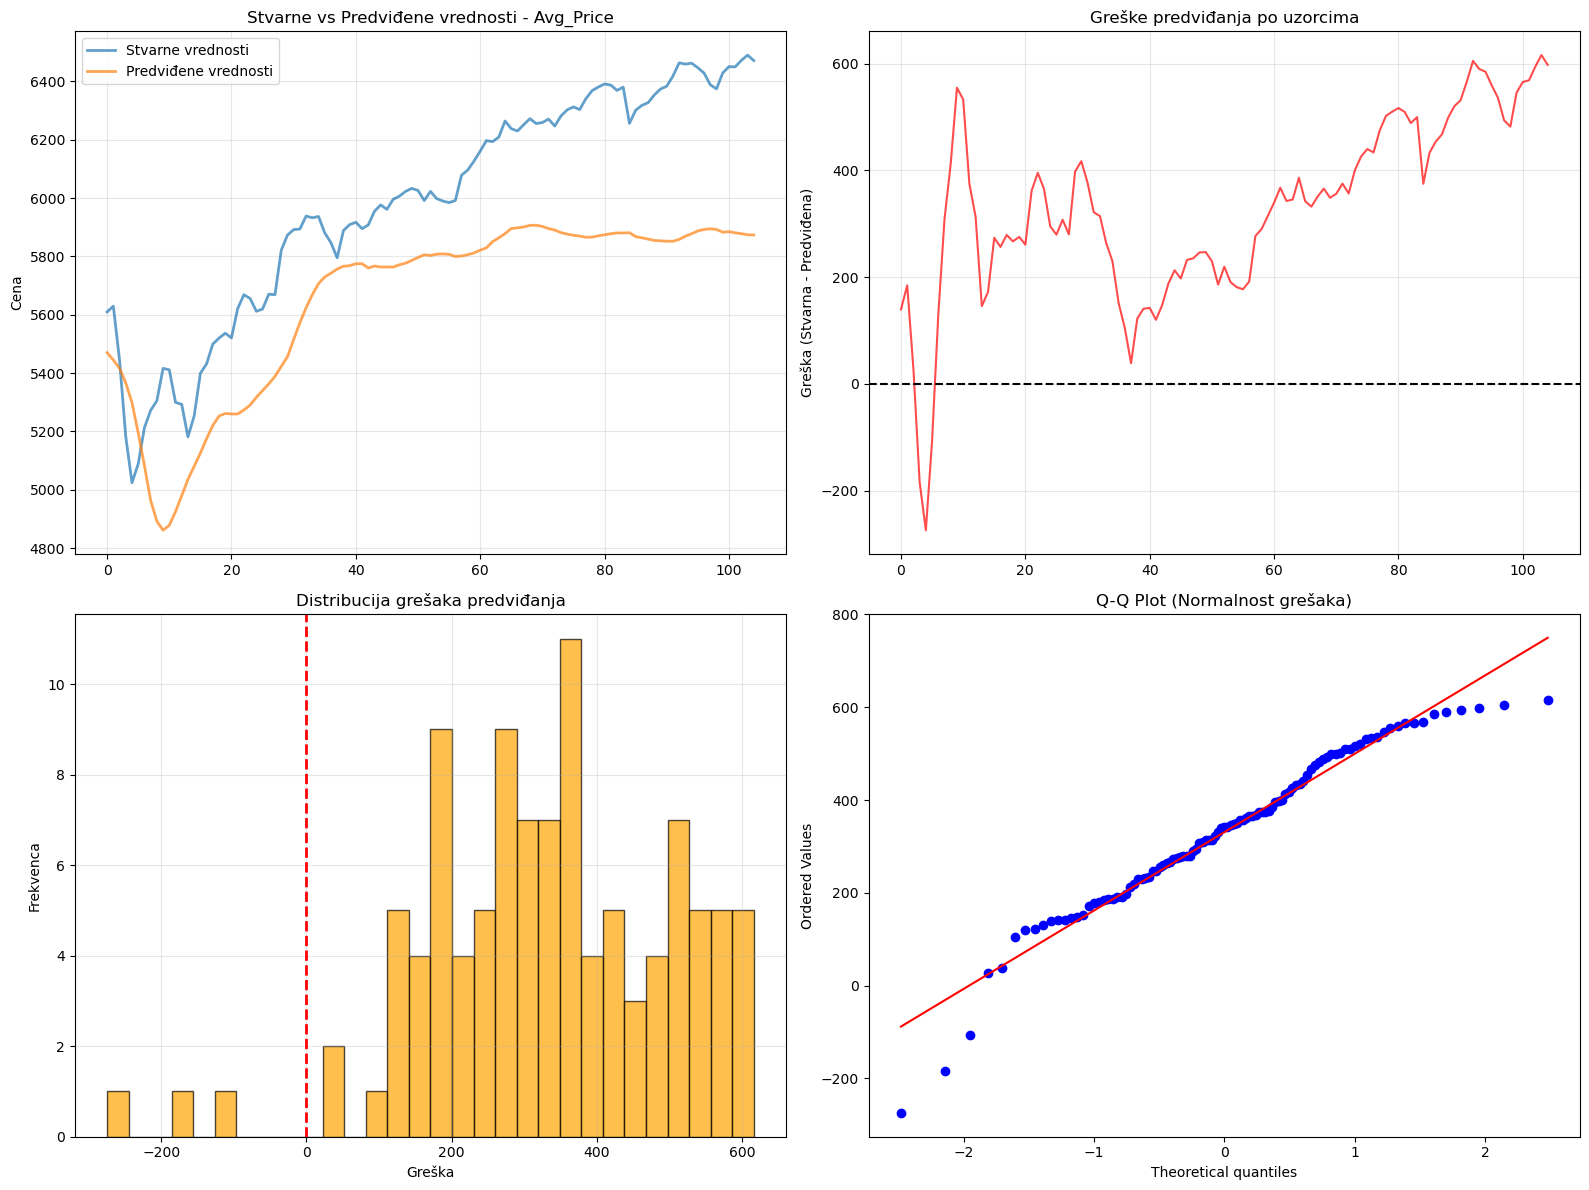


💰 TRGOVINSKA SIMULACIJA:
   Početni kapital: $10,000.00
   Konačni kapital (strategija): $10,836.46
   Konačni kapital (buy-and-hold): $11,535.75
   Sharpe ratio (strategija): 0.09
   Sharpe ratio (buy-and-hold): 0.14
   Broj buy signala: 24
   Broj sell signala: 9


In [65]:
# Evaluacija Avg_Price modela
print("🔍 EVALUACIJA AVG_PRICE MODELA")
metrics = evaluate_avg_price_model(results_fixed, 'Avg_Price')

# Tačnost pravca kretanja
direction_acc = calculate_direction_accuracy(
    results_fixed['Avg_Price']['actual'],
    results_fixed['Avg_Price']['predictions']
)

# Vizuelizacija
errors = plot_avg_price_predictions(results_fixed, 'Avg_Price')

# Trgovinska simulacija
strategy_returns, bh_returns, strategy_cum, bh_cum = trading_simulation_analysis(
    results_fixed['Avg_Price']['actual'],
    results_fixed['Avg_Price']['predictions']
)